# Introduction to PyTplot

This notebook demonstrates how to work with time series data using the `matplotlib` version of PyTplot. 

We'll install PySPEDAS to get PyTplot (as well as some load routines for quickly accessing some data, and additional tools for working with `tplot` variables). If you would like to install the `matplotlib` version of PyTplot without installing PySPEDAS, you can do so with:

`pip install pytplot-mpl-temp`

In [ ]:
!pip install pyspedas

If you're working in Google Colab, you'll need to restart the runtime after installing PyTplot using `exit()` or using the menu at: "Runtime" -> "Restart Runtime".

This is because we require a newer version of `matplotlib` than the one that comes pre-installed with Colab (due to a spectrogram bug)

In [2]:
exit()

## Load some data

We'll use MMS FPI ion data as an example; this is a good case to show because the data includes multi-dimensional distribution function data

In [ ]:
import pyspedas

pyspedas.mms.fpi(trange=['2015-10-16/13:05', '2015-10-16/13:06'],
                 data_rate='brst',
                 datatype=['dis-dist', 'dis-moms'])

## Plot some variables

The data are now loaded into `tplot` variables (the `t` stands for `timeseries`!); You can plot them with `tplot`:

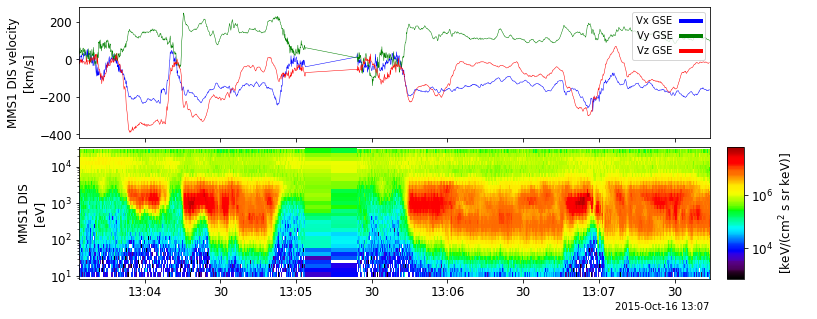

In [38]:
from pytplot import tplot

tplot(['mms1_dis_bulkv_gse_brst', 'mms1_dis_energyspectr_omni_brst'])

## Access the data and time values

You can access the data using `get_data`:

In [2]:
from pytplot import get_data

In [3]:
data = get_data('mms1_dis_dist_brst', dt=True)

## Time values

The `dt` option tells `get_data` to return the times as a `numpy` array of type `datetime64[ns]`. These are unix times (so no leap seconds) in UTC. 

In [5]:
data.times.shape

(1531,)

In [4]:
data.times

array(['2015-10-16T13:03:34.033868000', '2015-10-16T13:03:34.183868000',
       '2015-10-16T13:03:34.333868000', ...,
       '2015-10-16T13:07:43.485598000', '2015-10-16T13:07:43.635598000',
       '2015-10-16T13:07:43.785598000'], dtype='datetime64[ns]')

## Multi-dimensional data values

The data values are in `data.y` (note the 4D dataset, simply stored as a `numpy` array):

In [6]:
data.y.shape

(1531, 32, 16, 32)

This is a function of time, energy, theta and phi. The phi values, which are time varying for this dataset, are in `v1`:

In [7]:
data.v1.shape

(1531, 32)

The phi values for the first time stamp are:

In [8]:
data.v1[0, :]

array([  9.500004,  20.750004,  32.000004,  43.250004,  54.500004,
        65.75001 ,  77.00001 ,  88.25001 ,  99.50001 , 110.75001 ,
       122.00001 , 133.25    , 144.5     , 155.75    , 167.      ,
       178.25    , 189.5     , 200.75    , 212.      , 223.25    ,
       234.5     , 245.75    , 257.      , 268.25    , 279.5     ,
       290.75    , 302.      , 313.25    , 324.5     , 335.75    ,
       347.      , 358.25    ], dtype=float32)

The theta values are:

In [9]:
data.v2.shape

(16,)

In [10]:
data.v2

array([  5.625,  16.875,  28.125,  39.375,  50.625,  61.875,  73.125,
        84.375,  95.625, 106.875, 118.125, 129.375, 140.625, 151.875,
       163.125, 174.375], dtype=float32)

And the energy values are (also time varying for this dataset):

In [11]:
data.v3.shape

(1531, 32)

So the energy table for the first timestamp are:

In [12]:
data.v3[0, :]

array([1.206000e+01, 1.549000e+01, 1.989000e+01, 2.555000e+01,
       3.282000e+01, 4.216000e+01, 5.415000e+01, 6.956000e+01,
       8.934000e+01, 1.147600e+02, 1.474100e+02, 1.893400e+02,
       2.432100e+02, 3.124000e+02, 4.012700e+02, 5.154200e+02,
       6.620500e+02, 8.503900e+02, 1.092310e+03, 1.403060e+03,
       1.802200e+03, 2.314900e+03, 2.973450e+03, 3.819340e+03,
       4.905880e+03, 6.301520e+03, 8.094190e+03, 1.039685e+04,
       1.335458e+04, 1.715373e+04, 2.203368e+04, 2.830189e+04],
      dtype=float32)

## Access to the `xarray` `DataArray` objects

You can also access the underlying `DataArray` object using `get_data`:

In [13]:
xrdata = get_data('mms1_dis_dist_brst', xarray=True)

In [14]:
xrdata

<xarray.DataArray 'mms1_dis_dist_brst' (time: 1531, v1_dim: 32, v2_dim: 16,
                                        v3_dim: 32)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 2.21562505e-27],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.31603333e-27, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.08148318e-27, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[1.23251551e-20, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          8.42857433e-27, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 5.33773217e-27, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2015-10-16T13:03:34.033868 ... 2015-10-1...
    spec_bins  (v2_dim) float32 5.625 16.88 28.12 39.38 ... 151.9 163.1 174.4
    v1         (time, v1_dim) float32 9.5 20.75 32.0 43.25 ... 334.8 346.0 357.2
    v2         (v2_dim) float32 5.625 16.88 28.12 39.38 ... 151.9 163.1 174.4
    v3         (time, v3_dim) float32 12.06 15.49 19.89 ... 1.944e+04 2.497e+04
Dimensions without coordinates: v1_dim, v2_dim, v3_dim
Attributes:
    CDF:           {'VATT': {'CATDESC': 'MMS1 FPI/DIS burst sky-map instrumen...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

## Convert to other common time series objects (e.g. `pandas.DataFrame`)

If you would prefer to work with pandas objects, you can convert the `xarray` `DataArray`, e.g., to convert the DIS bulk velocity to a `pandas.DataFrame`:

In [15]:
xrbulkv = get_data('mms1_dis_bulkv_gse_brst', xarray=True)

In [16]:
pandas_bulkv = xrbulkv.to_pandas()

In [17]:
pandas_bulkv

v_dim,0,1,2
time,,,
2015-10-16 13:03:34.033868,16.787725,44.732758,-4.006111
2015-10-16 13:03:34.183868,-13.278414,27.278732,-24.978951
2015-10-16 13:03:34.333868,-8.596485,50.468029,-18.141851
2015-10-16 13:03:34.483868,16.211563,62.125938,-2.751714
2015-10-16 13:03:34.633868,16.194830,34.393234,-0.694268
...,...,...,...
2015-10-16 13:07:43.185598,-166.930237,107.481194,-19.305483
2015-10-16 13:07:43.335598,-162.216476,105.852036,-20.874670
2015-10-16 13:07:43.485598,-164.943756,105.786499,-20.113689


## Access the metadata

You can also access the metadata of a tplot variable using `get_data`:

In [19]:
metadata = get_data('mms1_dis_dist_brst', metadata=True)

This is just a dictionary, containing the CDF and plot metadata:

In [20]:
metadata.keys()

dict_keys(['CDF', 'plot_options'])

So to get the CDF metadata for our DF variable:

In [21]:
metadata['CDF']['VATT']

{'CATDESC': 'MMS1 FPI/DIS burst sky-map instrument distribution',
 'DEPEND_0': 'Epoch',
 'DEPEND_1': 'mms1_dis_phi_brst',
 'DEPEND_2': 'mms1_dis_theta_brst',
 'DEPEND_3': 'mms1_dis_energy_brst',
 'DISPLAY_TYPE': 'spectrogram',
 'FIELDNAM': 'MMS1 FPI/DIS brstSkyMap dist',
 'FILLVAL': -1e+31,
 'FORMAT': 'E12.2',
 'LABL_PTR_1': 'mms1_dis_sector_label_brst',
 'LABL_PTR_2': 'mms1_dis_pixel_label_brst',
 'LABL_PTR_3': 'mms1_dis_energy_label_brst',
 'SCALETYP': 'log',
 'SI_CONVERSION': '1e12>s^3 m^-6',
 'UNITS': 's^3/cm^6',
 'VALIDMIN': 0.0,
 'VALIDMAX': 1e+30,
 'VAR_NOTES': 'Az bin: sector ind=00 looks "after" (spin-phase) Sun, ..., sector ind=31 looks "before" Sun dir.  Head field-of-view: pixel index=00 looks to zenith, ..., pixel index=15 looks to nadir.  FPI operations nominally bin data from 64 energy filters into 32 pairwise energy bins, indexed 0-31.  Nominally, bins are indexed in increasing energy order.  See FPI docs for details.',
 'VAR_TYPE': 'data'}

## Create a `tplot` variable

Use `store_data` to create a `tplot` variable:

In [35]:
from pytplot import store_data
import numpy as np

For our time values, we'll just create an array of 100 values from 0 to 100 as an example. If the input to `store_data` are floats, they should be unix times in UTC

In [36]:
times = np.linspace(0, 100, 100)

For the data values, we'll use the cosine of the time values

In [31]:
cosine = np.cos(times)

In [32]:
store_data('cosine', data={'x': times,
                           'y': cosine})

True

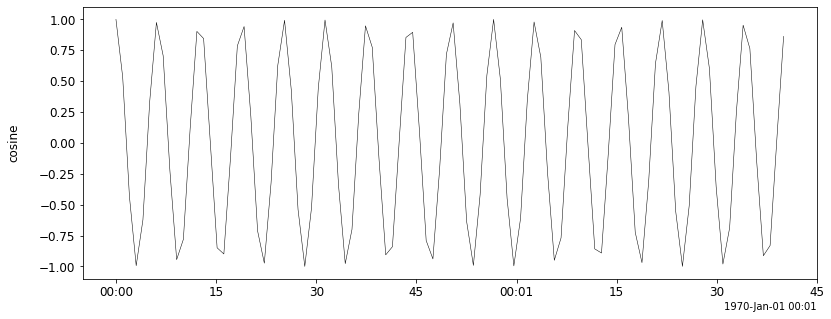

In [34]:
from pytplot import tplot

tplot('cosine')

In addition to `x` and `y`, `store_data` accepts the `v` tag (for spectrograms), as well as the `v1`, `v2` and `v3` tags (for multi-dimensional data).

For the time values (`x`), `store_data` accepts `datetime64` objects as well:

In [45]:
times = np.array([1, 2, 3, 4, 5], dtype='datetime64[s]')

In [46]:
times

array(['1970-01-01T00:00:01', '1970-01-01T00:00:02',
       '1970-01-01T00:00:03', '1970-01-01T00:00:04',
       '1970-01-01T00:00:05'], dtype='datetime64[s]')

In [47]:
store_data('another_variable', data={'x': times,
                                     'y': [1, 2, 3, 4, 5]})

True

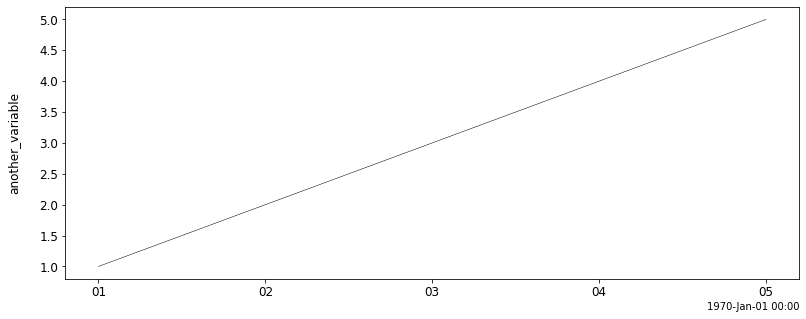

In [48]:
tplot('another_variable')

## Combine multiple `tplot` variables

You can split a tplot variable into individual components using `split_vec`, and combine them using `join_vec`, e.g., 

Note: keeping track of the metadata needs to be improved

In [49]:
from pytplot import join_vec, split_vec

In [50]:
split_vec('mms1_dis_bulkv_gse_brst')

['mms1_dis_bulkv_gse_brst_x',
 'mms1_dis_bulkv_gse_brst_y',
 'mms1_dis_bulkv_gse_brst_z']

Plot the individual components:

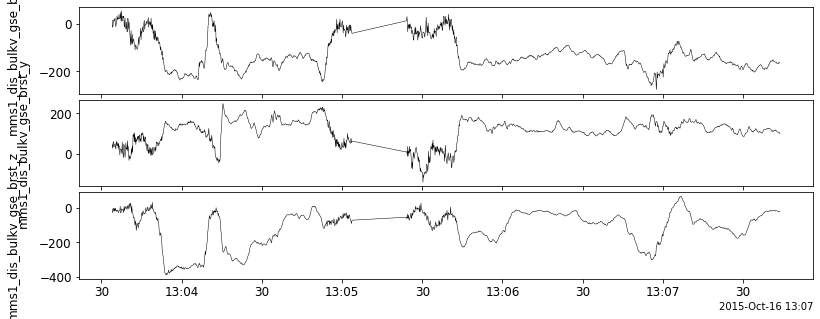

In [51]:
from pytplot import tplot

tplot(['mms1_dis_bulkv_gse_brst_x',
       'mms1_dis_bulkv_gse_brst_y',
       'mms1_dis_bulkv_gse_brst_z'])

And you can use `join_vec` to join them back together:

In [52]:
join_vec(['mms1_dis_bulkv_gse_brst_x',
          'mms1_dis_bulkv_gse_brst_y',
          'mms1_dis_bulkv_gse_brst_z'], new_tvar='bulkv_from_components')

'bulkv_from_components'

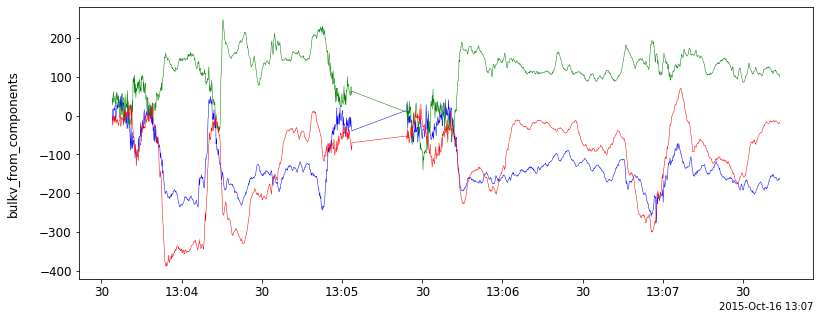

In [53]:
tplot('bulkv_from_components')

## More examples

Please see the following for more examples:
### Loading Data
- [MMS examples](https://github.com/spedas/mms-examples/tree/master/basic)
- [THEMIS examples](https://github.com/spedas/themis-examples/tree/main/basic)
- [Load data from HAPI servers](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PySPEDAS_loading_data_from_HAPI_servers.ipynb)
- [Exploring the Heliosphere with Python](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Exploring_the_Heliosphere_with_Python.ipynb)

### Plotting Data
- [Annotations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_annotations.ipynb)
- [Range options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_range_options.ipynb)
- [Spectrogram options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_spectrogram_options.ipynb)
- [Legend options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_legend_options.ipynb)
- [Markers and symbols](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_markers_and_symbols.ipynb)
- [Error bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_error_bars.ipynb)
- [Pseudo variables](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_pseudo_variables.ipynb)
- [Highlight intervals and vertical bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_highlight_intervals_and_vertical_bars.ipynb)


### Dates and Times
- [Working with dates and times](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Working_with_dates_and_times_with_PySPEDAS_PyTplot.ipynb)

### Coordinate Transformations
- [Coordinate transformations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Coordinate_transformations_with_OMNI_data.ipynb)
- [Transforming MMS data to boundary normal (LMN) coordinates](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_LMN_coordinate_transformation.ipynb)
- [Quaternion transformations with SpacePy](https://github.com/spedas/mms-examples/blob/master/basic/MMS_quaternion_coordinate_transformations.ipynb)

### Analysis
- [Plasma calculations with PlasmaPy](https://github.com/spedas/mms-examples/blob/master/advanced/Plasma%20calculations%20with%20PlasmaPy.ipynb)
- [Calculating Poynting flux with MMS data](https://github.com/spedas/mms-examples/blob/master/advanced/Poynting_flux_with_MMS_data.ipynb)
- [Plasma beta with MMS data](https://github.com/spedas/mms-examples/blob/master/basic/Plasma%20Beta%20with%20FGM%20and%20FPI%20data.ipynb) (note: the PlasmaPy notebook above shows a much easier method)
- [Curlometer calculations](https://github.com/spedas/mms-examples/blob/master/basic/Curlometer%20Technique.ipynb)
- [Neutral sheet models](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_neutral_sheet_models.ipynb)
- [Wave polarization calculations](https://github.com/spedas/mms-examples/blob/master/advanced/Wave_polarization_using_SCM_data.ipynb)
- [Dynamic power spectra calculations](https://github.com/spedas/mms-examples/blob/master/basic/Search-coil%20Magnetometer%20(SCM).ipynb)
- [2D slices of MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate_2D_slices_of_FPI_and_HPCA_data.ipynb)
- [Generating spectrograms and moments from MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate%20spectrograms%20and%20moments%20with%20mms_part_getspec.ipynb)
